## **The Sparks Foundation** 

### #GRIPJUNE21

## Task: Prediction using Supervised ML

### Data Scientist : Ashok Sihag

Step 1: Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Step 2: Import Dataset

In [2]:
data_url = 'http://bit.ly/w-data'

In [3]:
score = pd.read_csv(data_url)

In [4]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
score.shape

(25, 2)

Step 3: Data cleaning and processing

In [6]:
#checking for null value

score.isna().sum().sum()

0

Dataset has no null value

Step 4: Exploratory Data Analysis

In [7]:
score.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [8]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


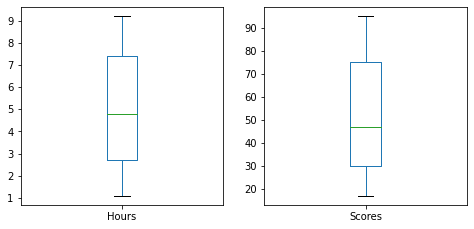

In [9]:
#checking for outlier

score.plot(kind='box',figsize=(8,8), layout=(2,2), sharex=False, subplots=True);

Data has no outliers

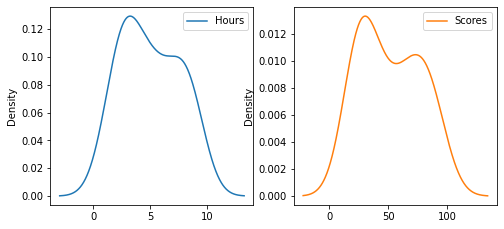

In [10]:
#ploting features 

score.plot(kind='kde',figsize=(8,8), layout=(2,2), sharex=False, subplots=True);

Data is normally distributed

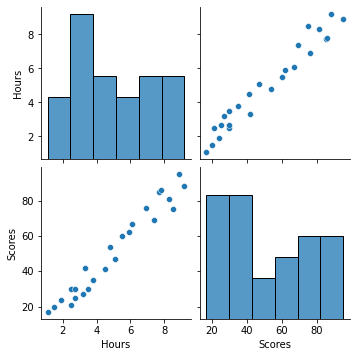

In [11]:
#ploting pairplot

sns.pairplot(score);

From pairplot we can see that there is a positive linear relation

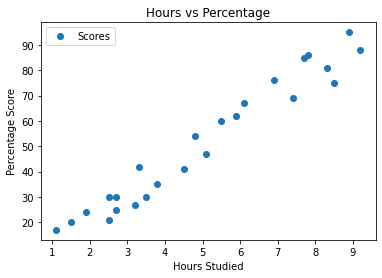

In [24]:
# Plotting the distribution of scores
score.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

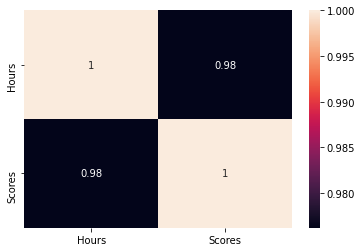

In [12]:
#heatmap for features

sns.heatmap(score.corr(), annot=True);

We can see these are highly correlated

Step 5: Model Building

In [13]:
# defineing features

X = score.iloc[:, :-1].values  
y = score.iloc[:, 1].values 

In [14]:
#spliting the test train data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [15]:
#defining model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#printing intercept and slope
print('y intercept: ',model.intercept_)
print('slope: ',model.coef_)

y intercept:  2.018160041434662
slope:  [9.91065648]


In [17]:
#predicting the target variable
y_pred = model.predict(X_test)


In [18]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
temp_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#model evaluation


from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.183859899002982
Mean Squared Error:  21.598769307217456
Root Mean Squared Error:  4.647447612100373


In [20]:
print(metrics.r2_score(y_test, y_pred))

0.9454906892105354


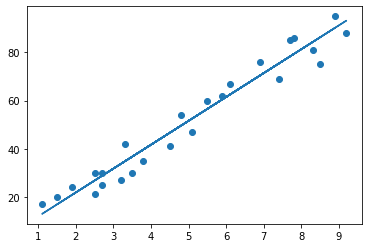

In [21]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Prediction

In [25]:
# now we can test with your own data
hours = 9.25
pred = model.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
